In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. 범주형 데이터

범주형 데이터(Categorical data)는 명목형 데이터와 순서형 데이터로 나눌 수 있습니다. 범주형 데이터 는 정량적인 측정이 불가능하며, 특정 카테고리에 속하는 경우가 많습니다.

범주형 데이터는 다양한 분야에서 사용됩니다. 예를 들어, 설문 조사에서는 대상자의 성별, 연령대, 학력 수준 등을 명목형 데이터로, 만족도 조사에서는 만족도 수준을 순서형 데이터로 측정하여 분석합니다. 범주형 데이 터를 다룰 때는 적절한 요약 방법과 시각화 방법을 선택하여 데이터를 파악해야 합니다.

### *막대그래프*

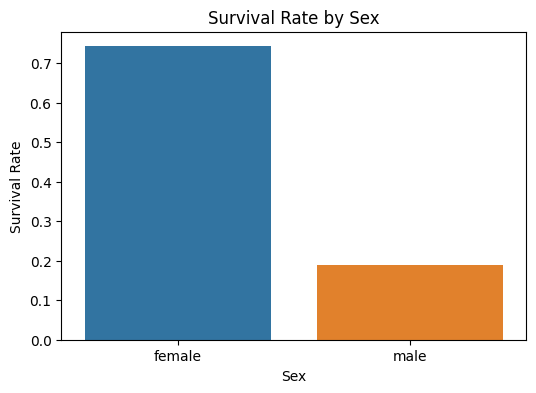

In [2]:
#데이터 불러오기
titanic_df = pd.read_csv("./data/Titanic_data.csv")

#성별에 따른 생존률 계산
survived_by_sex = titanic_df.groupby('Sex')['Survived'].mean()

#막대 그래프로 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=survived_by_sex.index, y=survived_by_sex.values)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64 Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64


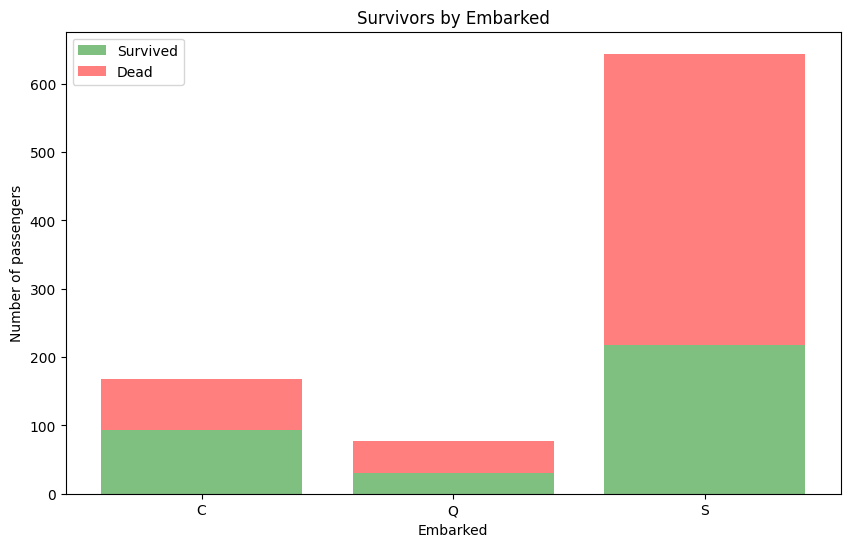

In [3]:
#탑승 항구에 따른 생존자 수
survived_embarked = titanic_df.groupby('Embarked')['Survived'].sum()
dead_embarked = titanic_df.groupby('Embarked')['Survived'].count() - survived_embarked
print(survived_embarked, dead_embarked)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(survived_embarked.index, survived_embarked.values, color='g', alpha=0.5, label='Survived')
plt.bar(dead_embarked.index, dead_embarked.values, bottom=survived_embarked.values, color='r',
        alpha=0.5, label='Dead')
plt.title('Survivors by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

### *카이제곱 검정*

두개이상의범주형변수가서로관련이있는지검증하는데사용됩니다.예를들어,성별 과 직업의 관계를 살펴보는 경우, 성별과 직업 간에 관련이 있는지 여부를 카이제곱 검정을 통해 검증할 수 있습니다.

상관관계 분석은 선형적인 관계를 보여주며, 카이제곱 검정은 개체간에 독립성을 판단하는 검증법이다

In [5]:
from scipy.stats import chi2_contingency

In [6]:
#예시 데이터 생성
observed_values = np.array([[10,20,30], [6,15,9]])

#카이제곱 검정 수행
chi2, p_value, dof, expected_values = chi2_contingency(observed_values)

#결과 출력
print(f"카이제곱 통계량: {chi2}")
#이 값이 클수록 두 변수 간의 관련성이 강하다
print(f"p-value: {p_value}")
#카이제곱 통계량이 유의미한 값인지 판단하기 위해 p-value도 고려
#두 관계가 우연히 발생할 확률(보통 0.05이하일 떄 유의미한 관련성이 있다고 판단)
print(f"자유도: {dof}")
#(행의 개수-1) * (열의 개수-1) = 자유도
print("기대값:")
print(expected_values)

카이제곱 통계량: 3.3997252747252746
p-value: 0.18270861966696167
자유도: 2
기대값:
[[10.66666667 23.33333333 26.        ]
 [ 5.33333333 11.66666667 13.        ]]


### *히트맵*

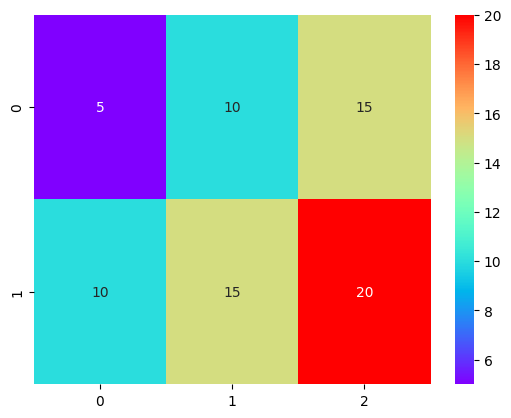

In [7]:
#데이터 생성
data = [[5,10,15] , [10,15,20]]

sns.heatmap(data, cmap='rainbow', annot=True, fmt='d', cbar=True)
#cmap은 heatmap의 색상을 지정
#annot 각 셀에 값을 표시
#fmt 값의 타입(d는 정수형)

plt.show()